# Single All-In-One Detection Model

## Overview: Creation of Single-Model System


---
## Project Workflow:
1. **Step 1: Install and Import Necessary Libraries**
2. **Step 2: Load Data**
3. **Step 3: Create Model**
4. **Step 4: Test Model**



# Step 1: Install and Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns



# Step 2: Load Data

In [3]:
X_train = pd.read_csv("data/models/X_train.csv")
y_train = pd.read_csv("data/models/y_train.csv")
X_val = pd.read_csv("data/models/X_val.csv")
y_val = pd.read_csv("data/models/y_val.csv")
X_test = pd.read_csv("data/models/X_test.csv")
y_test = pd.read_csv("data/models/y_test.csv")

# Step 3: Create Model

In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model.fit(X_train, y_train)

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=5)

## Test with Validation

In [5]:
y_val_pred = rf_model.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

          BF       1.00      0.99      0.99      4071
          BM       0.84      0.84      0.84      1243
          BN       0.97      0.99      0.98      7121
          CI       0.76      0.79      0.77      1387
       Mirai       0.96      0.80      0.87       203
         XSS       0.79      0.73      0.76      1357

    accuracy                           0.93     15382
   macro avg       0.89      0.86      0.87     15382
weighted avg       0.93      0.93      0.93     15382



## Hyperparameter Tuning - uncomment

In [6]:
# new_rf_model = RandomForestClassifier(random_state=10)
# param_grid = {
#     "n_estimators": [100, 200],
#     "max_depth": [10, 20],     
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2], 
#     "class_weight": [None, "balanced"] 
# }

# grid_search = GridSearchCV(
#     estimator=new_rf_model,
#     param_grid=param_grid,
#     scoring="f1_weighted", # imbalanced classes
#     cv=2,                 
#     verbose=2,
#     n_jobs=-1  
# )

# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Final Model Validation Test

In [7]:
# with best hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, random_state=5, class_weight="balanced", 
                                  max_depth=20, min_samples_split=2, min_samples_leaf=1)
rf_model.fit(X_train, y_train)

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=5)

In [8]:
y_val_pred = rf_model.predict(X_val)
val_recall = recall_score(y_val, y_val_pred, average='macro')
print(f'Validation Recall: {val_recall}')
print(classification_report(y_val, y_val_pred))

Validation Recall: 0.8766858344124914
              precision    recall  f1-score   support

          BF       1.00      0.98      0.99      4071
          BM       0.83      0.86      0.85      1243
          BN       0.98      0.98      0.98      7121
          CI       0.75      0.81      0.78      1387
       Mirai       0.89      0.88      0.89       203
         XSS       0.80      0.75      0.77      1357

    accuracy                           0.93     15382
   macro avg       0.87      0.88      0.88     15382
weighted avg       0.93      0.93      0.93     15382



# Step 4: Test Model


In [9]:
src_mac = X_test.pop("src_mac") #pop device name

In [10]:
y_test_pred = rf_model.predict(X_test)

#squeez to series to fit back src mac
y_test = y_test.squeeze()

test_results = pd.DataFrame({
    "src_mac": src_mac,
    "true_label": y_test,
    "predicted_label": y_test_pred
})

#metrics
test_recall = recall_score(y_test, y_test_pred, average='macro')
print(f'Test Recall: {test_recall}')
print(classification_report(y_test, y_test_pred))


Test Recall: 0.8819622596227933
              precision    recall  f1-score   support

          BF       1.00      0.98      0.99      4048
          BM       0.85      0.87      0.86      1231
          BN       0.98      0.98      0.98      7190
          CI       0.76      0.82      0.79      1376
       Mirai       0.90      0.88      0.89       236
         XSS       0.79      0.77      0.78      1301

    accuracy                           0.94     15382
   macro avg       0.88      0.88      0.88     15382
weighted avg       0.94      0.94      0.94     15382



## Test Brands

In [11]:
brand_perf = test_results.groupby("src_mac").apply(
    lambda group: classification_report(
        group["true_label"], 
        group["predicted_label"], 
        output_dict=True
    )
)


/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [12]:
# AI ---------------------------------

metrics = ['precision', 'recall', 'f1-score']  # Metrics to plot
plot_data = []

# Process brand performance for plotting
for brand, performance in brand_perf.items():
    # Extract relevant metrics for plotting
    precision = performance['weighted avg']['precision']
    recall = performance['weighted avg']['recall']
    f1 = performance['weighted avg']['f1-score']
    plot_data.append([brand, precision, recall, f1])

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(plot_data, columns=['src_mac', 'Precision', 'Recall', 'F1-Score'])

# Melt data for easier plotting
plot_df_melted = plot_df.melt(id_vars=['src_mac'], var_name='Metric', value_name='Value')

# AI ---------------------------------


## Test Detection Effectiveness for Specific Classes

In [13]:
# AI ---------------------------------
# Generate classification report as a dictionary
class_metrics = classification_report(
    y_test, y_test_pred, output_dict=True
)

# Convert class-wise metrics to a DataFrame
metrics_df = pd.DataFrame(class_metrics).transpose()

# Filter to include only the predicted classes
classwise_metrics = metrics_df.iloc[:-3, :]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Plot metrics for each predicted class
classwise_metrics_melted = classwise_metrics[['precision', 'recall', 'f1-score']].reset_index().melt(
    id_vars='index', var_name='Metric', value_name='Value'
)

# AI ---------------------------------

## Combined Plot

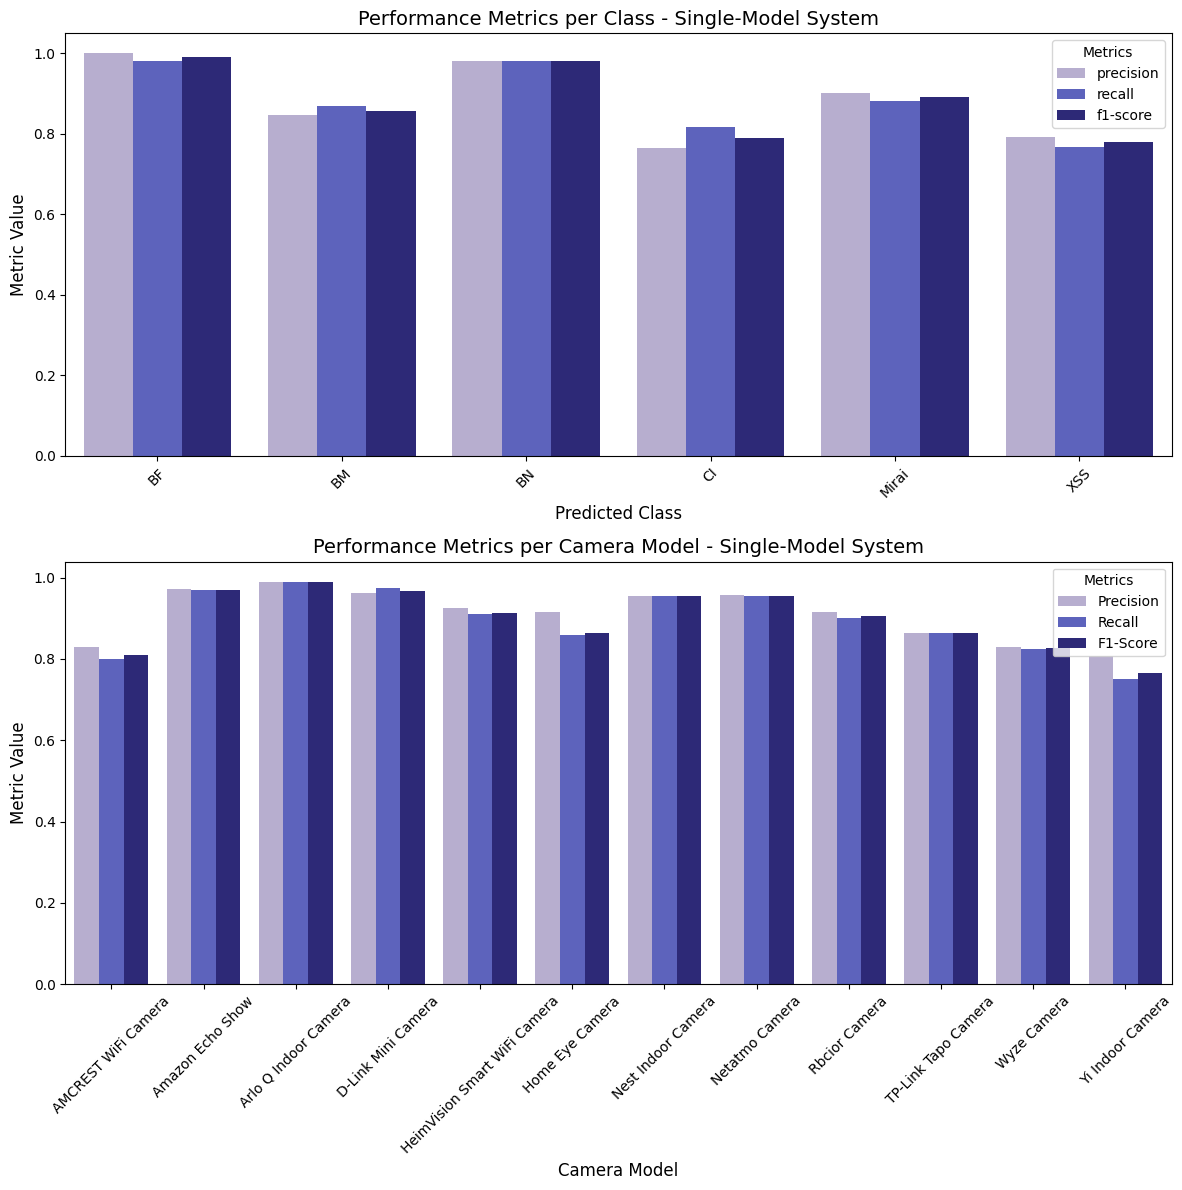

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# plot 1 - classes
sns.barplot(ax=axes[0], x='index', y='Value', hue='Metric', data=classwise_metrics_melted, palette=['#B5A8D5', '#4D55CC', '#211C84'])
axes[0].set_title('Performance Metrics per Class - Single-Model System', fontsize=14)
axes[0].set_xlabel('Predicted Class', fontsize=12)
axes[0].set_ylabel('Metric Value', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].legend(title='Metrics', fontsize=10)

# plot2 - brands
sns.barplot(ax=axes[1], x='src_mac', y='Value', hue='Metric', data=plot_df_melted, palette=['#B5A8D5', '#4D55CC', '#211C84'])
axes[1].set_title('Performance Metrics per Camera Model - Single-Model System', fontsize=14)
axes[1].set_xlabel('Camera Model', fontsize=12)
axes[1].set_ylabel('Metric Value', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].legend(title='Metrics', fontsize=10)

plt.tight_layout()

plt.savefig('plots/Combined_Metrics1.svg', format='svg')
plt.show()

## Save Data


In [15]:
classwise_metrics_melted.to_csv('data/singleM_class.csv', index=False)
plot_df_melted.to_csv('data/singleM_devices.csv', index=False)